In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


In [2]:
water_data = pd.read_csv("water_potability.csv")
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
water_data.columns #list down the columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
water_data.shape #check row and columns

(3276, 10)

In [5]:
water_data.dtypes #check data types

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [6]:
water_data.info

<bound method DataFrame.info of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135

In [7]:
water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
water_data.duplicated().any()

False

In [9]:
water_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
null_df = water_data.isnull().sum().reset_index()
null_df.columns = ['column', 'Null_count']
null_df['%miss_value'] = round(null_df['Null_count']/len(water_data),2)*100
null_df

,column,Null_count,%miss_value
0,ph,491,15.0
1,Hardness,0,0.0
2,Solids,0,0.0
3,Chloramines,0,0.0
4,Sulfate,781,24.0
5,Conductivity,0,0.0
6,Organic_carbon,0,0.0
7,Trihalomethanes,162,5.0
8,Turbidity,0,0.0
9,Potability,0,0.0


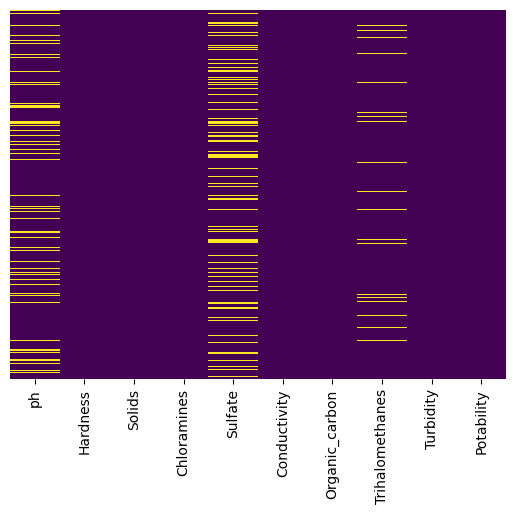

In [12]:
sns.heatmap(water_data.isnull(), yticklabels=False,cbar=False,cmap="viridis")
plt.show()

<Axes: ylabel='Frequency'>

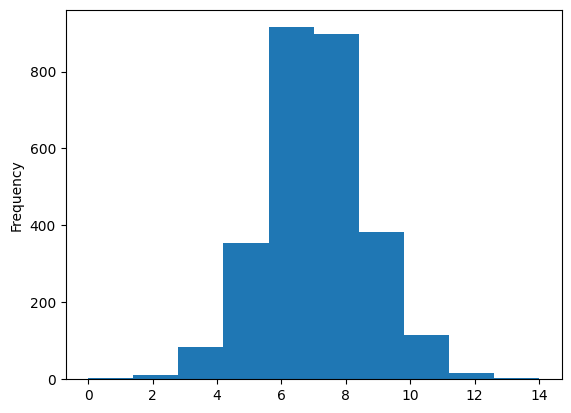

In [13]:
water_data['ph'].plot(kind = 'hist')

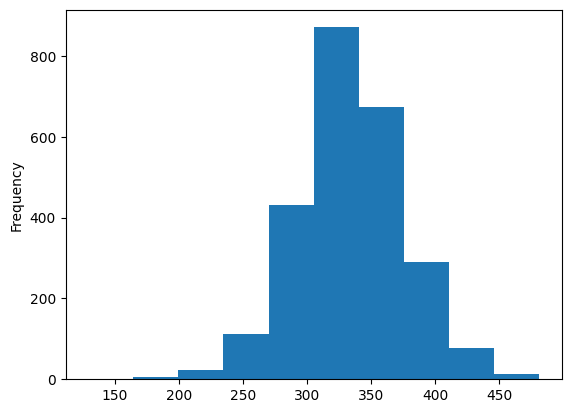

In [19]:
water_data['Sulfate'].plot(kind='hist')
plt.show()

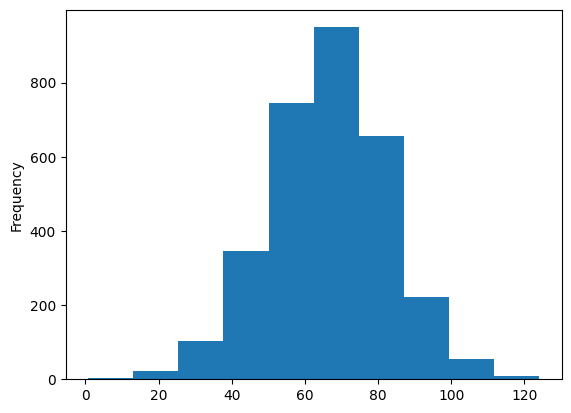

In [21]:
water_data['Trihalomethanes'].plot(kind = "hist")
plt.show()

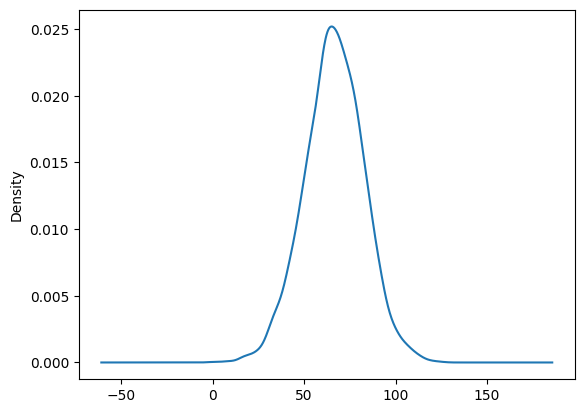

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
water_data["Trihalomethanes"].plot(kind="kde", ax = ax)
plt.show()

In [24]:
water_data['ph'] = water_data['ph'].fillna(water_data['ph'].mean())
water_data["Trihalomethanes"] = water_data['Trihalomethanes'].fillna(water_data["Trihalomethanes"].mean())
water_data['Sulfate'] = water_data['Sulfate'].fillna(water_data['Sulfate'].mean())

In [25]:
water_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64